# Hyperspectral remote sensing using machine learning models

## Introduction 

### Hyperspectral remote sensing

- Hyperspectral remote sensing, also known as imaging spectroscopy, is a relatively new technology that is currently being investigated by researchers and scientists with regard to the detection and identification of minerals, terrestial vegetation, and man-made materials and backgrounds.
- Hyperspectral remote sensing combines imaging and spectroscopy in a single system which often includes large data sets and require new processing methods. Hyperspectral data sets are generally composed of about 100 to 200 spectral bands of relatively narrow bandwidths (5-10 nm), whereas, multispectral data sets are usually composed of about 5 to 10 bands of relatively large bandwidths (70-400 nm).
- Hyperspectral imagery is typically collected (and represented) as a data cube with spatial information collected in the X-Y plane, and spectral information represented in the Z-direction.

### Objective 

- use machine learning models to enchance this process

## Base

1) <b>Remote sensing</b> is the process of detecting and monitoring the physical characteristics of an area by measuring its reflected and emitted radiation at a distance

2) Unlike typical images(3 channel : RGB) , satellite images are compsed of multiple bands

        for example :
            consider a satellite with 5 bands and it can be as following : 
                - band 1 : red
                - band 2 : green
                - band 3 : blue
                - band 4 : shortwave infrared
                - band 5 : near infrared 
        more info : https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands

3) so we will have multiple channels to work with  
        

<hr>

## Dataset

### Salinas scene

- This scene was collected by the 224-band AVIRIS sensor over Salinas Valley, California, and is characterized by high spatial resolution (3.7-meter pixels). 
- The area covered comprises 512 lines by 217 samples. 

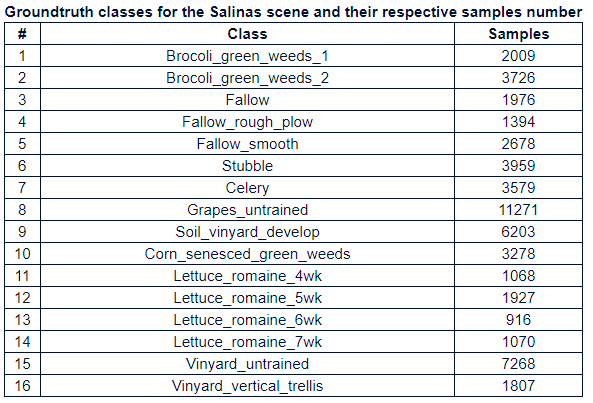

http://www.ehu.eus/ccwintco/uploads/a/a3/Salinas_corrected.mat 
http://www.ehu.eus/ccwintco/uploads/f/fa/Salinas_gt.mat

More data for future
http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes

<hr>

## Implmentation 

### Read data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import loadmat

import pandas as pd

In [2]:
# load data
scene = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
print("Height\t: " + str(scene.shape[0]))
print("Width\t: " + str(scene.shape[1]))
print("Bands\t: " + str(scene.shape[2]))

Height	: 512
Width	: 217
Bands	: 204


In [3]:
# convert it to pandas dataframe
data = pd.DataFrame(scene.reshape(scene.shape[0]*scene.shape[1], -1))
#data.columns = [f'band{i}' for i in range(1, data.shape[-1]+1)]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,104,96,109,93,54,79,54,36,11,17
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,111,94,111,96,56,83,56,36,11,15
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,106,88,107,89,54,81,54,30,11,11
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,100,86,105,85,56,75,50,30,11,19
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,96,83,105,83,48,75,50,24,9,17


In [4]:
# add data labes
ground_truth = loadmat('data/Salinas_gt.mat')['salinas_gt']
data['class'] = ground_truth.ravel()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


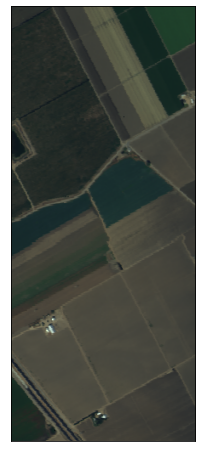

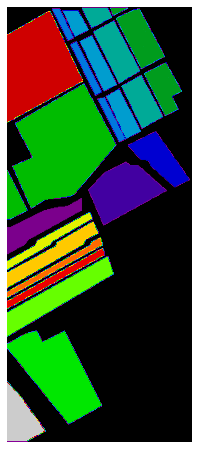

In [5]:
# plot original and ground truth
import earthpy.plot as ep
real = np.moveaxis(scene, -1, 0)
ep.plot_rgb(real, (29, 19, 9), figsize=(8, 8))
fig = plt.figure(figsize=(8, 8))
plt.imshow(ground_truth, cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [6]:
# 0 -> free area , black in above image
classify_df = data[data['class']!=0]
classify_df.head()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,class
305,369,558,787,1387,1765,1852,1820,2038,2372,2460,...,100,122,94,58,83,59,30,5,14,6
306,441,474,787,1344,1706,1852,1800,2022,2328,2473,...,104,116,98,64,87,55,32,11,25,6
307,441,558,787,1344,1706,1830,1781,2022,2343,2473,...,102,116,96,60,83,63,26,11,16,6
308,441,558,787,1344,1735,1830,1800,2038,2386,2512,...,94,118,104,56,85,51,32,7,12,6
309,441,474,787,1344,1735,1875,1858,2104,2430,2564,...,102,114,94,54,81,55,26,9,16,6


In [7]:
x = np.array(classify_df.iloc[:,:-1].values)
y = classify_df.loc[:, 'class']
x.shape,y.shape

((54129, 204), (54129,))

In [8]:
# scaling values
from sklearn.preprocessing import minmax_scale
x = minmax_scale(x, axis = 0)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(f'Number of training examples\t: {x_train.shape[0]}\nNumber of testing examples\t: {x_test.shape[0]}')

Number of training examples	: 37890
Number of testing examples	: 16239


## Machine Learning classifiers

In [29]:
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix , ConfusionMatrixDisplay
import seaborn as sns

In [31]:
classes = ['Brocoli_green_weeds_1', 
           'Brocoli_green_weeds_2',
           'Fallow',
           'Fallow_rough_plow',
           'Fallow_smooth',
           'Stubble',
           'Celery',
           'Grapes_untrained',
           'Soil_vinyard_develop',
           'Corn_senesced_green_weeds',
           'Lettuce_romaine_4wk',
           'Lettuce_romaine_5wk',
           'Lettuce_romaine_6wk',
           'Lettuce_romaine_7wk',
           'Vinyard_untrained',
           'Vinyard_vertical_trellis']

In [44]:
def print_cm(test,pred):
    cm = confusion_matrix(test, pred)
    fig, ax = plt.subplots(figsize=(12,12))         
    sns.heatmap(pd.DataFrame(cm, index = classes, columns = classes), annot=True, ax=ax)
    plt.show()
def helper_classifier(clf):
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    #print_cm(y_test,pred)
    print('Accuracy score : ' + str(accuracy_score(y_test, pred)))
    print(classification_report(y_test, pred, digits=4))

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
helper_classifier(knn)

Accuracy score : 0.9063981772276618
              precision    recall  f1-score   support

           1     1.0000    0.9858    0.9928       562
           2     0.9930    0.9991    0.9961      1139
           3     0.9649    0.9967    0.9805       606
           4     0.9797    1.0000    0.9898       435
           5     0.9952    0.9822    0.9886       842
           6     1.0000    1.0000    1.0000      1207
           7     1.0000    0.9925    0.9962      1070
           8     0.7719    0.8253    0.7977      3337
           9     0.9963    0.9968    0.9966      1887
          10     0.9406    0.9435    0.9420       973
          11     0.9596    0.9727    0.9661       293
          12     0.9683    0.9981    0.9830       521
          13     0.9854    0.9890    0.9872       273
          14     0.9848    0.9701    0.9774       334
          15     0.7179    0.6329    0.6727      2220
          16     0.9853    0.9907    0.9880       540

    accuracy                         0.9064 

### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=3.0, kernel='rbf', degree=6, cache_size=1024)
svm.fit(x_train, y_train)

In [ ]:
svm_pred = svm.predict(x_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")